# Average victim of a shark attack

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from src.functions import sex_filter,fatal_filter, age_cleaner

Database import from Kaggle's csv and selection of the needed columns

In [2]:
data = pd.read_csv("./input/GSAF5.csv",encoding='cp1252')
df = pd.DataFrame(data)
df = df[["Year","Country","Activity","Sex ","Age","Fatal (Y/N)"]]
df.head()

,Year,Country,Activity,Sex,Age,Fatal (Y/N)
0,2016,USA,Surfing,M,16,N
1,2016,USA,Surfing,M,36,N
2,2016,USA,Surfing,M,43,N
3,2016,AUSTRALIA,Surfing,M,NaN,N
4,2016,AUSTRALIA,Surfing,M,NaN,N


Data type of each column: there are two numeric values (Age & Year) and four categoric values (Country,Activity, Sex and Fatal).
Note: Age data type is corrected in the 'Age' cleaning section.

In [3]:
df.dtypes

Year            int64
Country        object
Activity       object
Sex            object
Age            object
Fatal (Y/N)    object
dtype: object

Checking how many null values are per column

In [4]:
null_cols = df.isnull().sum()
null_cols
null_cols[null_cols > 0]

Country          43
Activity        527
Sex             567
Age            2681
Fatal (Y/N)      19
dtype: int64

## Year
For reliability purposes the data used for this investigation starts in 1900. In the case of the "Year" it wasn't neccessary to clean the data. The amount of data for 1900 to 2016 its 5324 rows.


In [5]:
df = df[(df["Year"]>= 1900)]
print("There are ",df.shape[0]," results.")

There are  5324  results.


## Sex
For the "Sex" column it was required to rename the columns to erase the blank space at the end of the string. First, the na values were tag as "Unknown" and a categorizing function was applied to the data to group it by "M" for males and "F" for females and to ensure the categorization the set function was used.  4268 of the attacks were suffered by males whereas there were just 548 were the victims were females, so the hypothesis that mean are more affected for sharks attacks its confirmed.

In [6]:
df = df.rename(columns={"Sex ":"Sex"})
df["Sex"]= df["Sex"].fillna("Unknown")
df["Sex"] = df["Sex"].apply(sex_filter)
df["Sex"].value_counts().sort_values(ascending = False)

M          4268
F           548
Unknown     508
Name: Sex, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


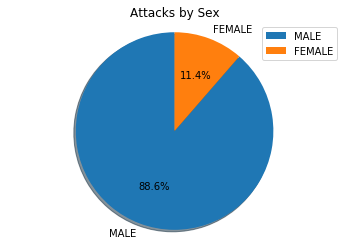

In [7]:
# Distribution of sharks attacks by sex of the victim

sex_table = df[["Sex","Year"]]
sex_table = sex_table.rename(columns={"Year":"Count"})
sex_table = sex_table[(sex_table["Sex"] != "Unknown")]
sex_table = sex_table.groupby(["Sex"]).count()
sex_table = sex_table.sort_values(by = ["Count"],ascending = False)

#pie graph for sharks attacks by sex

sex_labels = ["MALE","FEMALE"]
fig1, ax1 = plt.subplots()
ax1.pie(sex_table,labels = sex_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend()
ax1.set_title('Attacks by Sex')
plt.show()

## Fatal
About the Fatal column the na values were tag as "Unknown" and a categorizing function was applied to the data to group it by "Y" for fatal attacks and "N" for non-fatal and to ensure the categorization the set function was used. 4036 attacks were non-fatal whereas 1203 were fatal, so it's not true that are most of the times fatal for the victims.

In [8]:
df = df.rename(columns={"Fatal (Y/N)":"Fatal"})
df["Fatal"]= df["Fatal"].fillna("Unknown")
df["Fatal"] = df["Fatal"].apply(fatal_filter)
df["Fatal"].value_counts().sort_values(ascending = False)

N          4036
Y          1203
Unknown      85
Name: Fatal, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


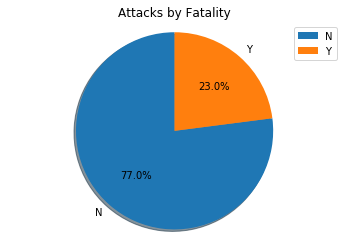

In [9]:
# Distribution of sharks attacks by fatal

fatal_table = df[["Fatal","Year"]]
fatal_table = fatal_table.rename(columns={"Year":"Count"})
fatal_table = fatal_table[(fatal_table["Fatal"]!= "Unknown")]
fatal_table = fatal_table.groupby(["Fatal"]).count()
fatal_table = fatal_table.sort_values(by = ["Count"],ascending = False)

#pie graph for sharks attacks by fatals

fatal_labels = ["N","Y"]
fig2, ax2 = plt.subplots()
ax2.pie(fatal_table,labels = fatal_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')
ax2.legend()
ax2.set_title('Attacks by Fatality')
plt.show()

## Country
About the country, a function was used to erase the blank spaces at the beginning and at the end of each value. The USA it's the most affected country by this kind of attacks with 1992 cases, then it follows with 1124 cases in Australia and the South Africa with 535 cases. It's confirmed that the USA is the country with the highest number of sharks attacks.

In [10]:
df["Country"]= df["Country"].fillna("Unknown")
df["Country"] = df["Country"].str.strip()
print(df["Country"].value_counts().sort_values(ascending = False))

USA                   1992
AUSTRALIA             1124
SOUTH AFRICA           535
PAPUA NEW GUINEA       129
BRAZIL                 100
                      ... 
BANGLADESH               1
ITALY / CROATIA          1
MEDITERRANEAN SEA?       1
WESTERN SAMOA            1
ARGENTINA                1
Name: Country, Length: 168, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  del sys.path[0]


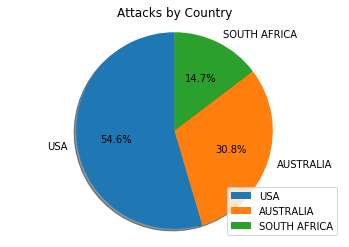

In [11]:
country_table = df[["Country","Year"]]
country_table = country_table.rename(columns={"Year":"Count"})
country_table = country_table[(country_table["Country"]!= "Unknown")]
country_table = country_table.groupby(["Country"]).count()
country_table = country_table.sort_values(by = ["Count"],ascending = False)

#take only the three most common values
country_table = country_table.iloc[0:3]

country_labels = ['USA','AUSTRALIA','SOUTH AFRICA']
fig3, ax3 = plt.subplots()
ax3.pie(country_table,labels = country_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')
ax3.legend(loc = 'lower right')
ax3.set_title('Attacks by Country')
plt.show()

## Age
First the data type was change to int then it was needed to fill the na values with the "Unknown" label and to uniform the data using a function. There were some attacks where there were more than one victim, so it was necessary to get the man value of the age and insert it in the data frame. Also the data was changed to the int type in order to perform the required calculations. The three more common values were 17,18 and 20 years and the mean was 27,22 years, so we could confirm that young people suffer more sharks attacks than older people.

In [12]:

df["Age"]= df["Age"].fillna("Unknown")
df["Age"] = df["Age"].apply(age_cleaner)
print(df["Age"].value_counts().sort_values(ascending = False))

Unknown    2113
17          143
18          139
20          133
16          132
           ... 
11            1
12            1
7             1
14            1
0             1
Name: Age, Length: 113, dtype: int64


In [13]:
# Mean age of the victim

age_table = df[(df["Age"]!= "Unknown")]
age_table["Age"] = age_table["Age"].apply(int)
print(round(age_table["Age"].mean(),2))

27.22


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
# Distribution of sharks attacks by age of the victim

age_table = df[["Age","Year"]]
age_table = age_table.rename(columns={"Year":"Count"})
age_table = age_table[(age_table["Age"]!= "Unknown")]
age_table = age_table.groupby(["Age"]).count()
age_table = age_table.sort_values(by = ["Count"],ascending = False)

age_table.head(5)

,Count
Age,
17,143
18,139
20,133
16,132
19,132


## Activity
Regarding the activity which was performing the victim when she or she was attacked, the column was cleaned using regex function with the most common activities saw in the set of the column. The three most common activities are: Surfing(1180), Fishing & Hunting (1020) and swimming (914). So it's confirmed that surfing is the most common case.

In [22]:
df["Activity"]= df["Activity"].fillna("Unknown")
df['Activity'] = df['Activity'].str.strip()
lst = []

for e in df["Activity"]:
    if re.search("Surf|surf",e):
        e = e.replace(e,'Surfing')
        lst.append(e)
        
    elif re.search("Disaster|Aircraft|aircraft|disaster|tsunami|storm|Wreck|wreck|Accident|accident|explo|Explo|Adrift|sank|foundered|capsized|burning|fog|crash|plunged|Foundering|fell|Fell|overboard|drift|shot down|rescue|aid|sunk|Sink|Hurricane|hurricane|squall|plane|feet|skiing|submarine|saving|Parachuted|down|steam|wave",e):
        e = e.replace(e,'Accidents or natural disasters')
        lst.append(e)
        
    elif re.search("Playing|Canoe|canoe|kite|Kite|race|Race|Racing|racing|Competing|kayak|Kayak|Scuba|dived|Dived|diver|diving|Diver|Diving|Snorkel|Paddl|Rowing|Bodyboarding|Body|body|paddl|Boogie|Scull",e):
        e = e.replace(e,"Other Water Sports")
        lst.append(e)
        
    elif re.search("Swimming|swimming",e):
        e = e.replace(e,"Swimming")
        lst.append(e)
        
    elif re.search("Fishing|fishing|Lobstering|Crabbing|crabbing|Killing|Harpoon|harpoon|Catching|Collecting|Hunting|Net|net|Fish|fish|Clamming",e):
        e = e.replace(e,"Fishing&Hunting")
        lst.append(e)
        
    elif re.search("Walking|walking",e):
        e = e.replace(e,"Walking")
        lst.append(e)
        
    elif re.search("Bathing|bathing|Floating|Standing|standing|Bather|Splash|splash|jump|Jump|Treading|Beach|beach|Sitting|water|float|Wading|wading",e):
        e = e.replace(e,"Bathing")
        lst.append(e)
        
    elif re.search("Attempting|attempting|Escaping|horse|religious",e):
        e = e.replace(e,"Stranger things")
        lst.append(e)
        
    elif re.search("Shark|shark",e):
        e = e.replace(e,"Shark related activities")
        lst.append(e)
        
    elif re.search("Boat|boat|Boating|boating|Sailing|sailing|Cruising|raft",e):
        e = e.replace(e,"Boating")
        lst.append(e)
        
    elif re.search("Murder|Disappeared|disappeared|found|Unknown|male|nan|miss|details|\.",e):
        e = e.replace(e,"UnKnown")
        lst.append(e)
        
    else:
        e = e.replace(e,"Others")
        lst.append(e)
        
        
df["Activity"] = lst

activity_table = df[["Activity","Year"]]
activity_table = activity_table.rename(columns={"Year":"Count"})
activity_table = activity_table[(activity_table["Activity"]!= "Unknown")]
activity_table = activity_table.groupby(["Activity"]).count()
activity_table = activity_table.sort_values(by = ["Count"],ascending = False)

activity_table.head(5)

,Count
Activity,
Others,2210
Surfing,1180
Fishing&Hunting,1020
Swimming,914


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


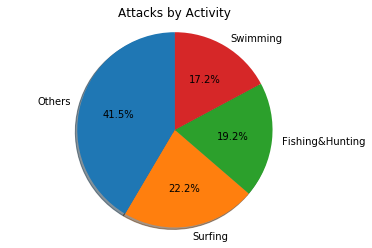

In [23]:
# Distribution of sharks attacks by activity

activity_labels = ["Others","Surfing","Fishing&Hunting","Swimming"]
fig4, ax4 = plt.subplots()
ax4.pie(activity_table,labels = activity_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax4.axis('equal')
ax4.set_title('Attacks by Activity')
plt.show()

## Cleaned data base

In [17]:
df = df[["Year","Country","Sex","Age","Activity","Fatal"]]
display(df)

,Year,Country,Sex,Age,Activity,Fatal
0,2016,USA,M,16,Surfing,N
1,2016,USA,M,36,Surfing,N
2,2016,USA,M,43,Surfing,N
3,2016,AUSTRALIA,M,Unknown,Surfing,N
4,2016,AUSTRALIA,M,Unknown,Surfing,N
...,...,...,...,...,...,...
5320,1900,USA,M,Unknown,Other,Y
5321,1900,USA,Unknown,Unknown,Other,N
5322,1900,AUSTRALIA,M,Unknown,Other,N
5323,1900,USA,M,Unknown,Unknown,N


In [18]:
# Export to csv
#df.to_csv("sharksattacks.csv")